# Overview.
Wind turbine power output is known for having a strong correlation with wind speed. In this project, Simple Linear Regression was built for predicting the turbine response for a given wind speed.  this project will be completed using:

a method from NumPy package that performs least squares fit to data. 
a function from SciPy that uses non-linear least squares to fit a function f to data. 
The notebook also includes an analysis of a data set powerproduction and its preprocessing.

The performance evaluation of the models was conducted using two metrics - R-squared regression score  and Root Mean Squared Error (RMSE). The indicators of a good model are low RMSE and high R-squared regression score.

In [1]:
# Numerical arrays.
import numpy as np

# Models.
from numpy.polynomial.polynomial import Polynomial as poly
from scipy.optimize import curve_fit

# Data frames.
import pandas as pd

from scipy import stats
# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.titlesize"] = 18

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

# Reading the Data and Performing Basic Data Checks.

In [3]:
df = pd.read_csv("powerproduction.txt")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has 500 rows and 2 columns with two numerical variables, speed and power, which are represented by real numbers. There are no empty values in the data set

In [4]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The mean speed is 12.59, while the mean power stands at 48.01. Moreover, there is a difference in the scale of the variables: speed has a range between 0.00 to 25.00 and power - between 0.00 and 113.556. This difference will be addressed in the preprocessing.

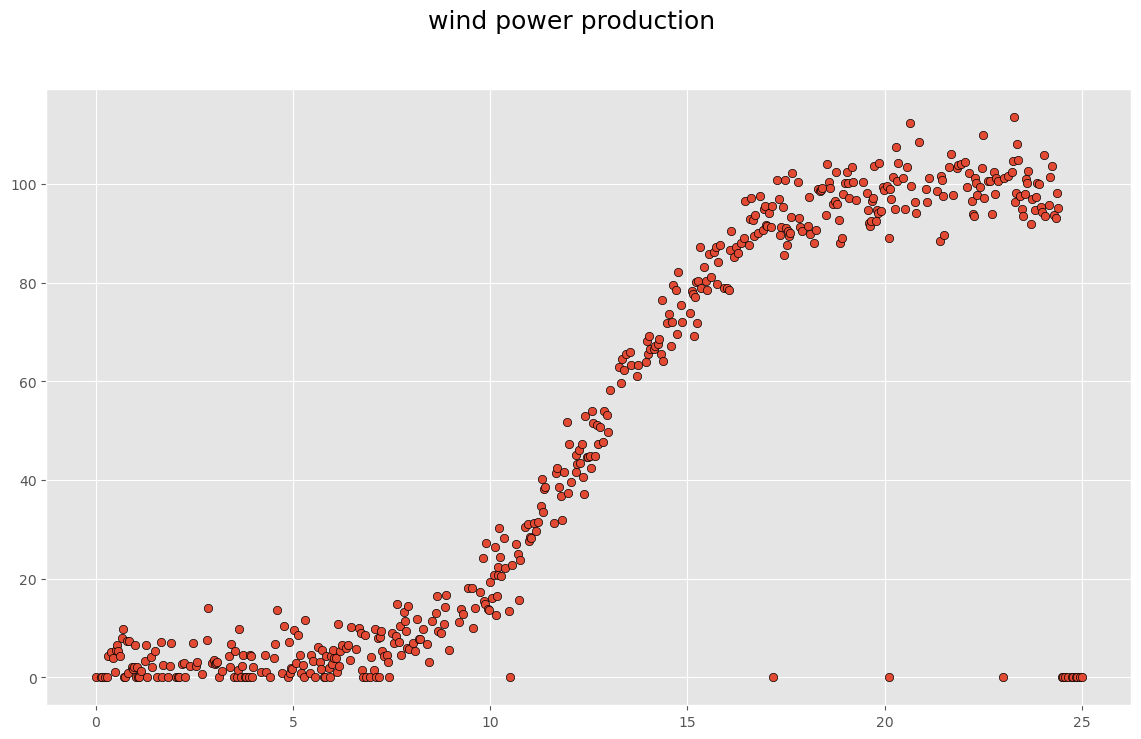

In [5]:
fig, ax = plt.subplots()
fig.suptitle("wind power production")
ax.scatter(df.speed, df.power, edgecolor="black")
plt.show()

The above plot shows that the relationship between Power and Speed predominantly takes an "S"-shape. The power rises dramatically with speed at about 8 m/s and slows when the speed reaches approximately 17 m/s.

Additionally, we can see some outliers where the speed is between 5 m/s and 24 m/s, approximately. However, the power is still 0. The 0 power points for around 25 m/s wind speed may result from shutting down the wind turbine to mitigate damage, and so I will not consider them as outliners.



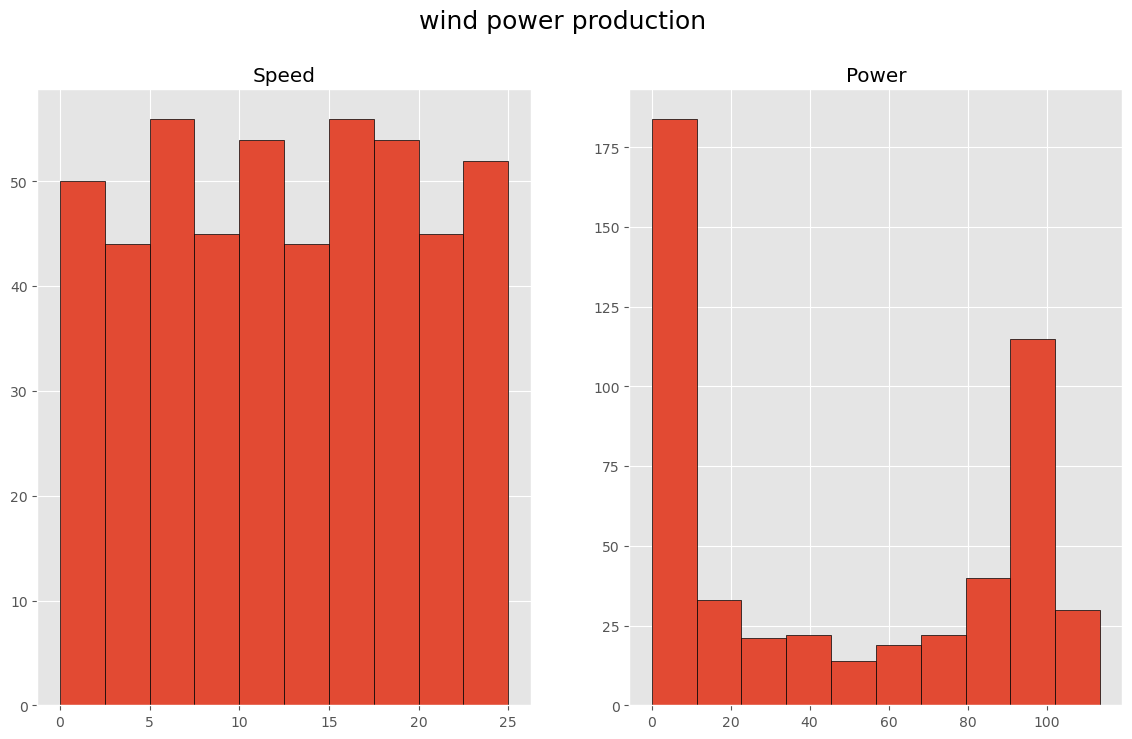

In [6]:
fig, [ax1, ax2] =plt.subplots(1, 2)
fig.suptitle("wind power production")
ax1.set_title("Speed")
ax2.set_title("Power")
ax1.hist(df.speed, edgecolor="black")
ax2.hist(df.power, edgecolor="black")

# Show the plots.
plt.show()

As we can see data does not appear to attain normal distribution and it is difficult to say which type of distribution will fit any of the variables with any degree of certainty. I will run some tests to confirm this

[Text(0.5, 1.0, 'Q-Q Test - power'), Text(0, 0.5, 'power')]

<Figure size 1400x800 with 0 Axes>

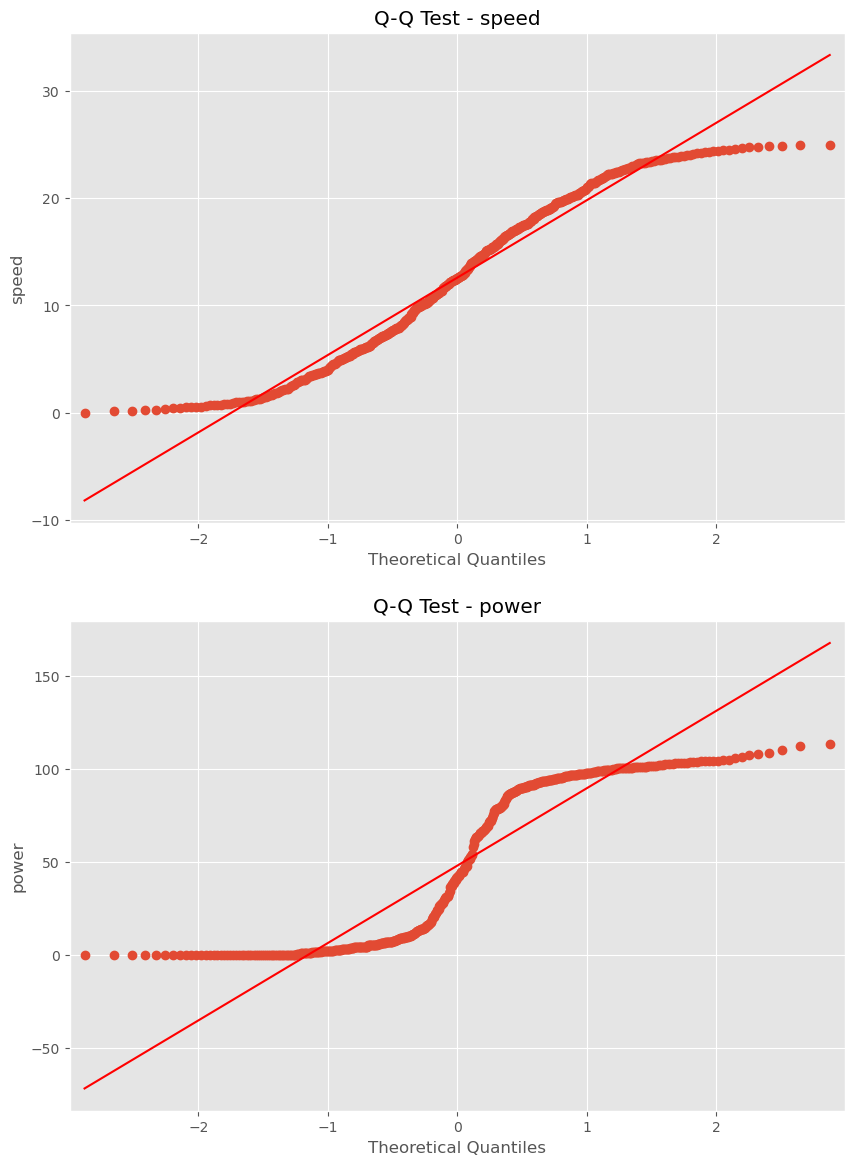

In [7]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()

fig, ax = plt.subplots(2,1, figsize=(10, 14))

# plot qq charts with data
qqplot(df['speed'],ax = ax[0], line='s', )
qqplot(df['power'],ax = ax[1], line='s', )




# set title and axis labels
ax[0].set(title='Q-Q Test - speed', ylabel = 'speed' )
ax[1].set(title='Q-Q Test - power', ylabel = 'power')

running a qq test to confirm data is not of a normal disturbution as we can see power is quite skewed, 

In [8]:
import warnings
import scipy.stats as st
def get_best_distribution(df):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(df)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(df, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [9]:
get_best_distribution(df['speed'])

p value for norm = 0.0225408186055381
p value for exponweib = 9.141457310193858e-89
p value for pareto = 2.144029355479189e-12
p value for weibull_max = 2.595339150941573e-182
p value for weibull_min = 0.011034902604552909
p value for skewnorm = 0.02251185748021312


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:5001: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:5001: RuntimeWarning: overflow encountered in scalar multiply
  fac1 = a / np.pi * np.exp(gamma)


p value for norminvgauss = 0.020382449298167273
p value for powernorm = 0.0037370183879680617
p value for uniform = 0.9979378103495921
 
Best fitting distribution: uniform
Best p value: 0.9979378103495921
Parameters for the best fit: (0.0, 25.0)


In [10]:
get_best_distribution(df['power'])

p value for norm = 1.5449329008359337e-16
p value for exponweib = 5.316930354231246e-73
p value for pareto = 3.027194204142864e-79
p value for weibull_max = 1.8851647213771997e-291
p value for weibull_min = 7.880363159975487e-10
p value for skewnorm = 1.308972115880688e-23
p value for norminvgauss = 4.9015605651342825e-23
p value for powernorm = 3.7084025391011053e-19
p value for uniform = 1.7155342844656695e-33
 
Best fitting distribution: weibull_min
Best p value: 7.880363159975487e-10
Parameters for the best fit: (0.8324727310387517, -9.493314122434549e-27, 50.801594180532014)


the above confirms that speed is unifrom while power is skewed

Data Preprocessing.
Prior to building models the data should undergo data preprocessing.

There are 4 steps:

1. Removing Outliers
2. Creating arrays for the speed and the power.
3. Scaling to account for the difference in scale of the variables.
4. Creating the training and test data sets.


1. Removing Outliers.
The first step is to remove the outliers from our data set

In [11]:
df_new = df.drop(df[(df.power == 0) & (df.speed > 5) & (df.speed < 24)].index)
df_new

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


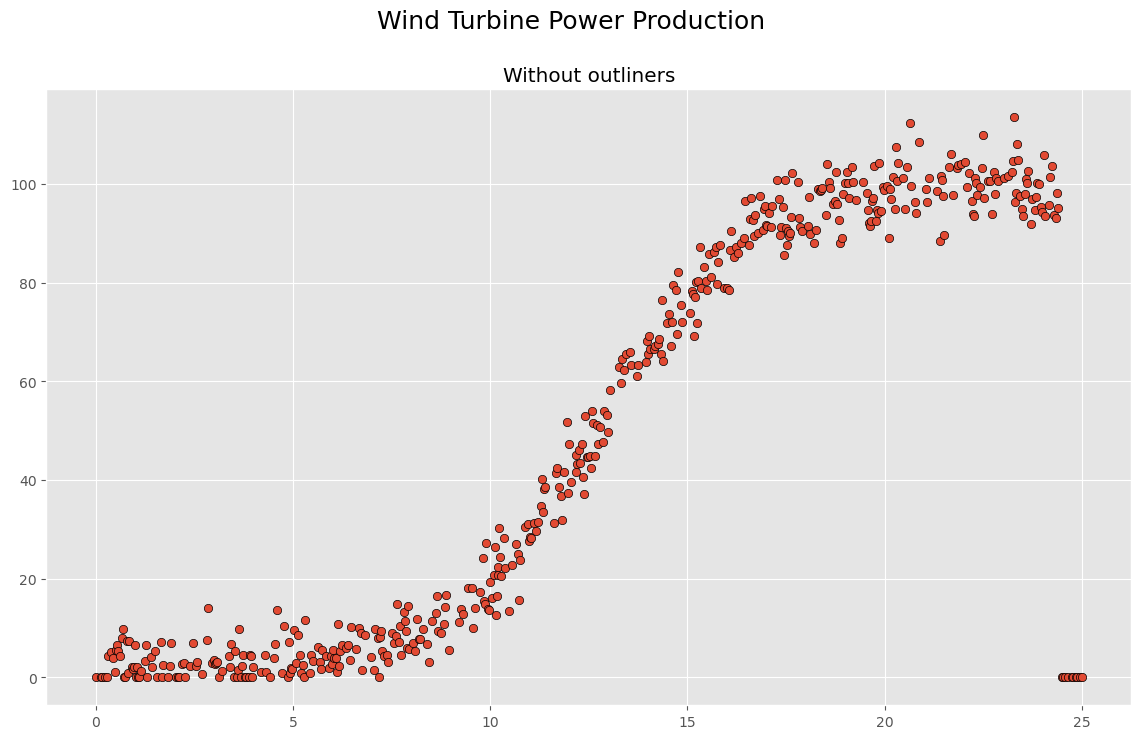

In [12]:
fig, ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")
ax.set_title("Without outliners")
ax.scatter(df_new.speed, df_new.power, edgecolor="black")
plt.show()

# 2. Creating Arrays for the Speed and the Power Variables.
Now the data set should be separated for speed and power values.

In [13]:
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values
x = np.array(speed)
y = np.array(power)

# 3. Scaling.
Next we can scale the variables. By comparing different scalers I reached the conclusion that the best results are achieved with MinMaxScaler. 

In [14]:
X_scaled = (x - np.min(x)) / np.ptp(x)
y_scaled = (y - np.min(y)) / np.ptp(y)

# The scaled data set.
df_rescaled = pd.DataFrame({"speed":X_scaled, "power":y_scaled})
df_rescaled

,speed,power
0,0.000,0.0
1,0.005,0.0
2,0.006,0.0
3,0.009,0.0
4,0.011,0.0
...,...,...
482,0.991,0.0
483,0.994,0.0
484,0.995,0.0
485,0.998,0.0


# 4. Creating the Training and Test Data sets.
We will build our model on the training set and evaluate its performance on the test set.

In [15]:
shuffle_df = df_rescaled.sample(frac=1, random_state=1)

# Define a size for your train set 
train_size = int(0.7 * len(df_rescaled))

# Split the data on training and test
speed_train, speed_test = shuffle_df.speed[:train_size].values, shuffle_df.speed[train_size:].values
power_train, power_test = shuffle_df.power[:train_size].values, shuffle_df.power[train_size:].values

# Print the shape of the new sets.
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")


Training set: (340,), (340,)
Test set: (147,), (147,)


Build, Predict, and Evaluate the Models with NumPy

Simple Linear Regression.

In [16]:
linear = poly.fit(speed_train, power_train, 1)
linear

Polynomial([0.42812243, 0.55525802], domain=[0., 1.], window=[-1.,  1.], symbol='x')

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [17]:
y_train_linear = linear(speed_train)
y_test_linear = linear(speed_test)

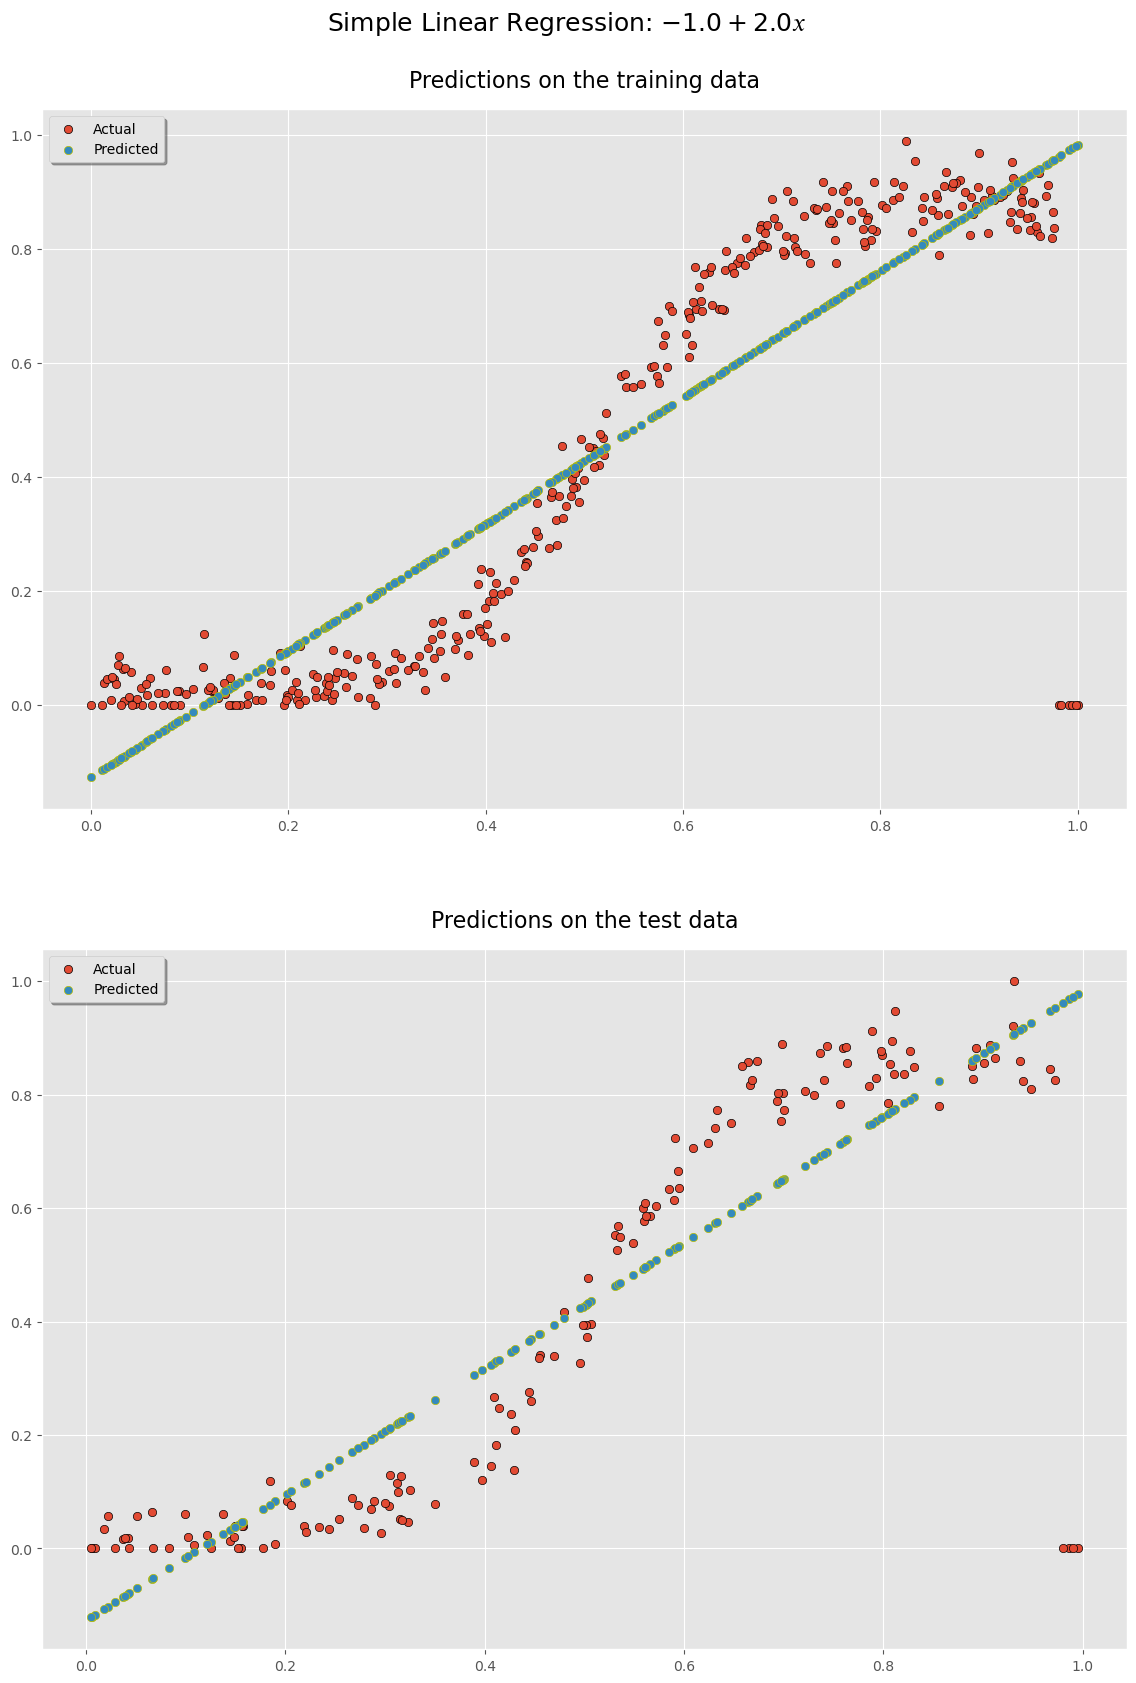

In [18]:
def plot(pred_train, pred_test, title):
    """Plot the actual and predicted data."""
    # Create a figure, axis and titles.
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
    fig.suptitle(f"{title}", y = 0.93)
    ax1.set_title("Predictions on the training data",y=1.02, fontsize=16)
    ax2.set_title("Predictions on the test data",y=1.02, fontsize=16)

    # Plot the actual training data and predictions.
    ax1.scatter(speed_train, power_train, edgecolor="black",  label="Actual")
    ax1.scatter(speed_train, pred_train, edgecolor="y", label="Predicted")

    # Plot the actual test data and predictions.
    ax2.scatter(speed_test, power_test, edgecolor="black",  label="Actual")
    ax2.scatter(speed_test, pred_test, edgecolor="y", label="Predicted")

    # Show and lock the legend.
    ax1.legend(loc='upper left', shadow=True)
    ax2.legend(loc='upper left', shadow=True)

    # Show the plot.
    plt.show()

# Plot the actual and predicted data for simple linear regression.
plot(y_train_linear, y_test_linear, "Simple Linear Regression: $-1.0+2.0𝑥$")
    
    
    
    

It is clear from the the above plots that Simple Linear Regression underfits our data. Furthermore, it does not reflect the downward trend after the speed reaches about 24.4 m/s. Finally, it predicts negative values and the variables in the original data set are non-negative.

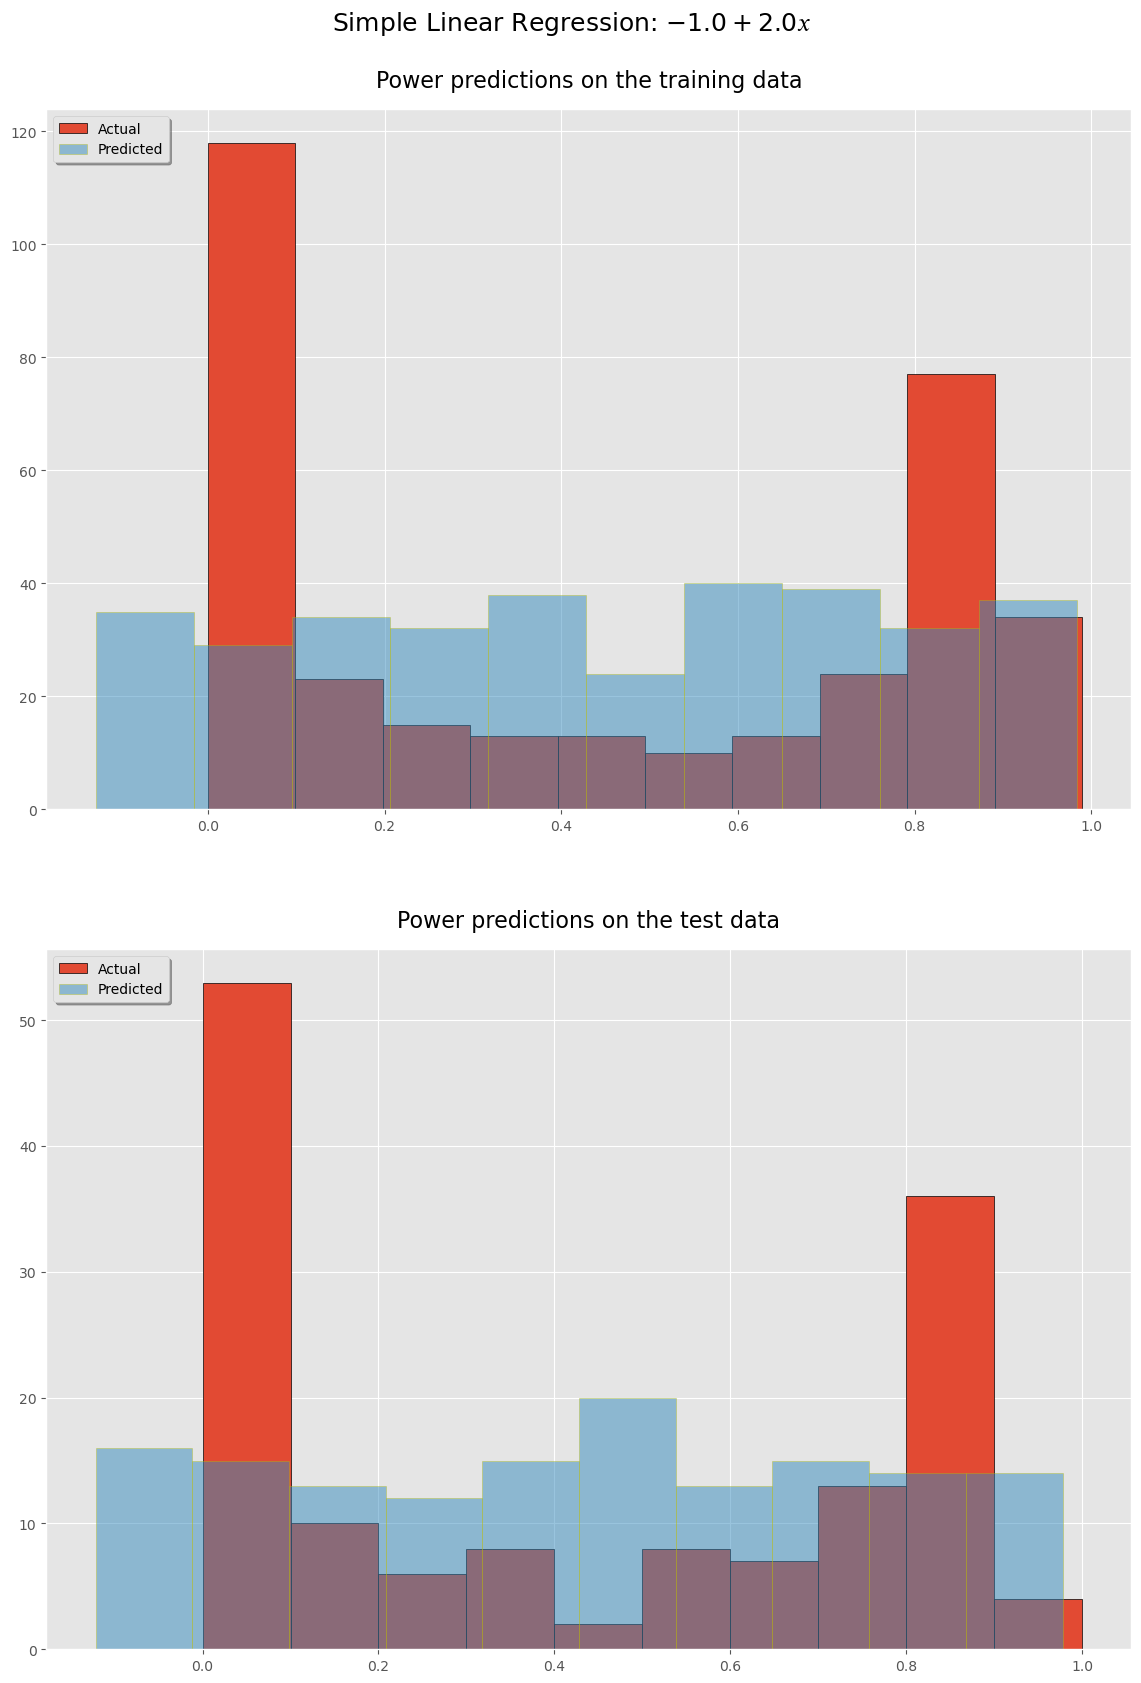

In [19]:
def hist(pred_train, pred_test, title):
    """Histograms to compare the predicted and actual power distribution"""
    # Create a figure, axis and titles.
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
    fig.suptitle(f"{title}", y = 0.93)
    ax1.set_title("Power predictions on the training data",y=1.02, fontsize=16)
    ax2.set_title("Power predictions on the test data",y=1.02, fontsize=16)

    # Plot the actual training data and predictions.
    ax1.hist(power_train, edgecolor="black",  label="Actual")
    ax1.hist(pred_train, edgecolor="y", label="Predicted", alpha=0.5)

    # Plot the actual test data and predictions.
    ax2.hist(power_test, edgecolor="black",  label="Actual")
    ax2.hist(pred_test, edgecolor="y", label="Predicted", alpha=0.5)

    # Show the legend.
    ax1.legend(loc='upper left', shadow=True)
    ax2.legend(loc='upper left', shadow=True)

    # Show the plot.
    plt.show()

# Comparing power distribution for simple linear regression.
hist(y_train_linear, y_test_linear, "Simple Linear Regression: $-1.0+2.0𝑥$")

The histograms show that the predicted power output is distributed rather diffirently from the original data.


To view the results the rescaled power needs to be transformed back. To improve the performance of Simple Linear Regression I will also add two constraints for removing negative and very high predicted values.

For comparison of the actual and predicted power I randomly chose the 1st output from training power and the 14th from the test power. Additionally, I will check if the predicted power is 0 for 0 m/s, 30 m/s and 70 m/s

In [20]:
def unscale(power):
    power_unscaled = power * np.ptp(y) + np.min(y)
    if power_unscaled < 0.0 or power_unscaled > np.max(y):
        return 0.0
    else:
        return f"{power_unscaled:.3f}"

In [21]:
def comparison(pred_train, pred_test):
    """Comparison of the predictions and the actual power on the training and test data."""
    # Printing actual and predicted training power.
    print(f"TRAINING DATA\nActual power:\t {unscale(power_train[0])}")
    print(f"Predicted power: {unscale(pred_train[0])}")

    # Printing actual and predicted test power.
    print(f"\nTEST DATA\nActual power:\t {unscale(power_test[13])}")
    print(f"Predicted power: {unscale(pred_test[13])}")

def extra_samples(model):
    """Printing predicted power for 0, 30 and 70 m/s speed with and without the constraint."""
    print("\nWITHOUT THE CONSTRAINT")
    print(f"Predicted power for wind speed 0: {(model(0)* np.ptp(y) + np.min(y)):.3f}")
    print(f"Predicted power for wind speed 30: {(model(30)* np.ptp(y) + np.min(y)):.3f}")
    print(f"Predicted power for wind speed 70: {(model(70)* np.ptp(y) + np.min(y)):.3f}")

    print("\nWITH THE CONSTRAINT")
    print(f"Predicted power for wind speed 0: {unscale(model(0))}")
    print(f"Predicted power for wind speed 30: {unscale(model(30))}")
    print(f"Predicted power for wind speed 70: {unscale(model(70))}")
    
# Comparison of the predictions and the actual data for the simple linear regression.
comparison(y_train_linear, y_test_linear)
extra_samples(linear)

TRAINING DATA
Actual power:	 4.443
Predicted power: 24.570

TEST DATA
Actual power:	 91.125
Predicted power: 73.797

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: -14.437
Predicted power for wind speed 30: 3768.736
Predicted power for wind speed 70: 8812.966

WITH THE CONSTRAINT
Predicted power for wind speed 0: 0.0
Predicted power for wind speed 30: 0.0
Predicted power for wind speed 70: 0.0


The above shows a significant overestimation of the training power and a significant underestimation of the test power for the chosen samples. As for the samples outside of the data set, we can see that the model predicts negative value for 0 m/s and extreme positive values for 30 m/s and 70 m/s. The added constraints have fixed these issues.

Evaluation

Let's calculate RMSE and R-squared score.

In [23]:
def r_2(x,y):
    correlation_matrix = np.corrcoef(x, y)
    r_squared = correlation_matrix[0,1]**2
    return r_squared

# RMSE
def rmse(x,y):
    rmse = np.sqrt(np.mean((y-x)**2))
    return rmse

# Calculate a score and RMSE for the training data.
def train(pred):
    print("TRAINING DATA\nRMSE: \t\t", rmse(power_train,pred))
    print("R-squared Score:", r_2(power_train, pred))

# Calculate a score and RMSE for the test data.
def test(pred):
    print("\nTEST DATA\nRMSE: \t\t", rmse(power_test,pred))
    print("R-squared Score:", r_2(power_test,pred))

# Calculated metrics for the simple linear regression.
train(y_train_linear)
test(y_test_linear)
    

TRAINING DATA
RMSE: 		 0.17499621284165545
R-squared Score: 0.7730151580555513

TEST DATA
RMSE: 		 0.19666060415232325
R-squared Score: 0.6991996513082247


The metrics show that Simple Linear Regression is a better fit for the training data than for the test data. Nevertheless, it demonstrates a clear underfitting for both.

Polynomial Regression
This model demonstrates how to approximate a function with polynomial features by using Polynomial Regression.


Model Building.

The first step to building the Polynomial Regression is finding the best fitting degree.

In [25]:
degrees = []

for degree in range(1,35): # Higher degree gives a warning of a unproper fit.
    pol = poly.fit(speed_train, power_train, degree)
    y_test_polynomial = pol(speed_test)
    # Append score.
    degrees.append((degree, r_2(power_test,y_test_polynomial), rmse(power_test,y_test_polynomial)))

# Sort scores in the reverse order by the score. 
degrees.sort(key=lambda x:float(x[1]), reverse=True)

# Return only the first 5 results.
for j in degrees[:5]:
    # Print results.
    print(f'{j}')

(30, 0.9803484987668177, 0.05043282662578617)
(33, 0.9796074024946966, 0.05199974734769626)
(29, 0.9789276733819199, 0.05270492495729913)
(34, 0.978923606968233, 0.05270365605130607)
(28, 0.9786819598088882, 0.05253790466532514)


The results found that the degree 30 scores the best.



In [26]:
n = 30 
polynomial = poly.fit(speed_train, power_train, n)
polynomial

Polynomial([ 4.24121347e-01,  1.20088243e+00, -1.72808405e+00,  2.86958032e+01,
        1.39701204e+02, -1.47265882e+03, -4.64074278e+03,  3.10707383e+04,
        8.17870964e+04, -3.67111784e+05, -8.59620576e+05,  2.71513708e+06,
        5.82691431e+06, -1.33863661e+07, -2.68015845e+07,  4.56691285e+07,
        8.63373387e+07, -1.10027243e+08, -1.98161324e+08,  1.88462764e+08,
        3.25619727e+08, -2.27979100e+08, -3.80012278e+08,  1.90240030e+08,
        3.07363199e+08, -1.04137824e+08, -1.63722975e+08,  3.36390227e+07,
        5.16343023e+07, -4.85806613e+06, -7.30098446e+06], domain=[0., 1.], window=[-1.,  1.], symbol='x')

Prediction

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [27]:
y_train_poly = polynomial(speed_train)
y_test_poly = polynomial(speed_test)

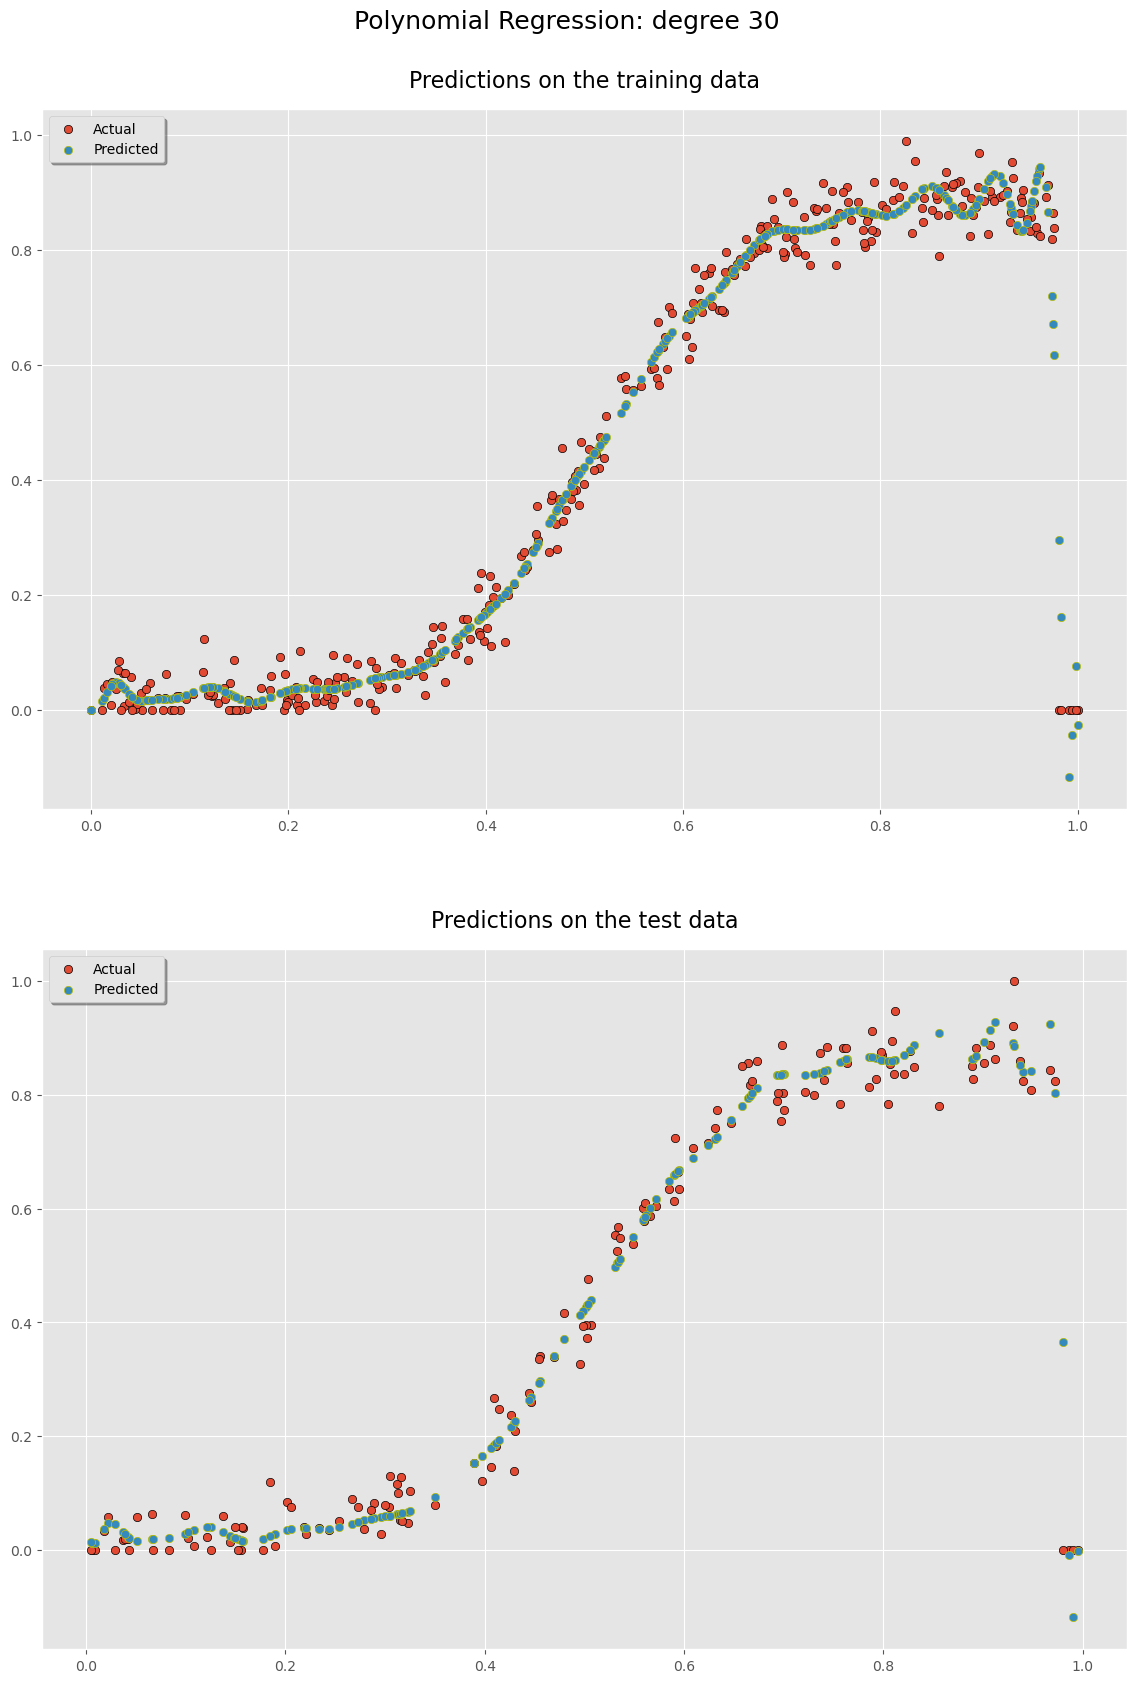

In [28]:
plot(y_train_poly, y_test_poly, f"Polynomial Regression: degree {n}")

The predicted data appears to be well-fitting to the actual data. However, like the simple linear regression model, it does predict negative values. In contrast to the previous model, it does reflect the downward trend

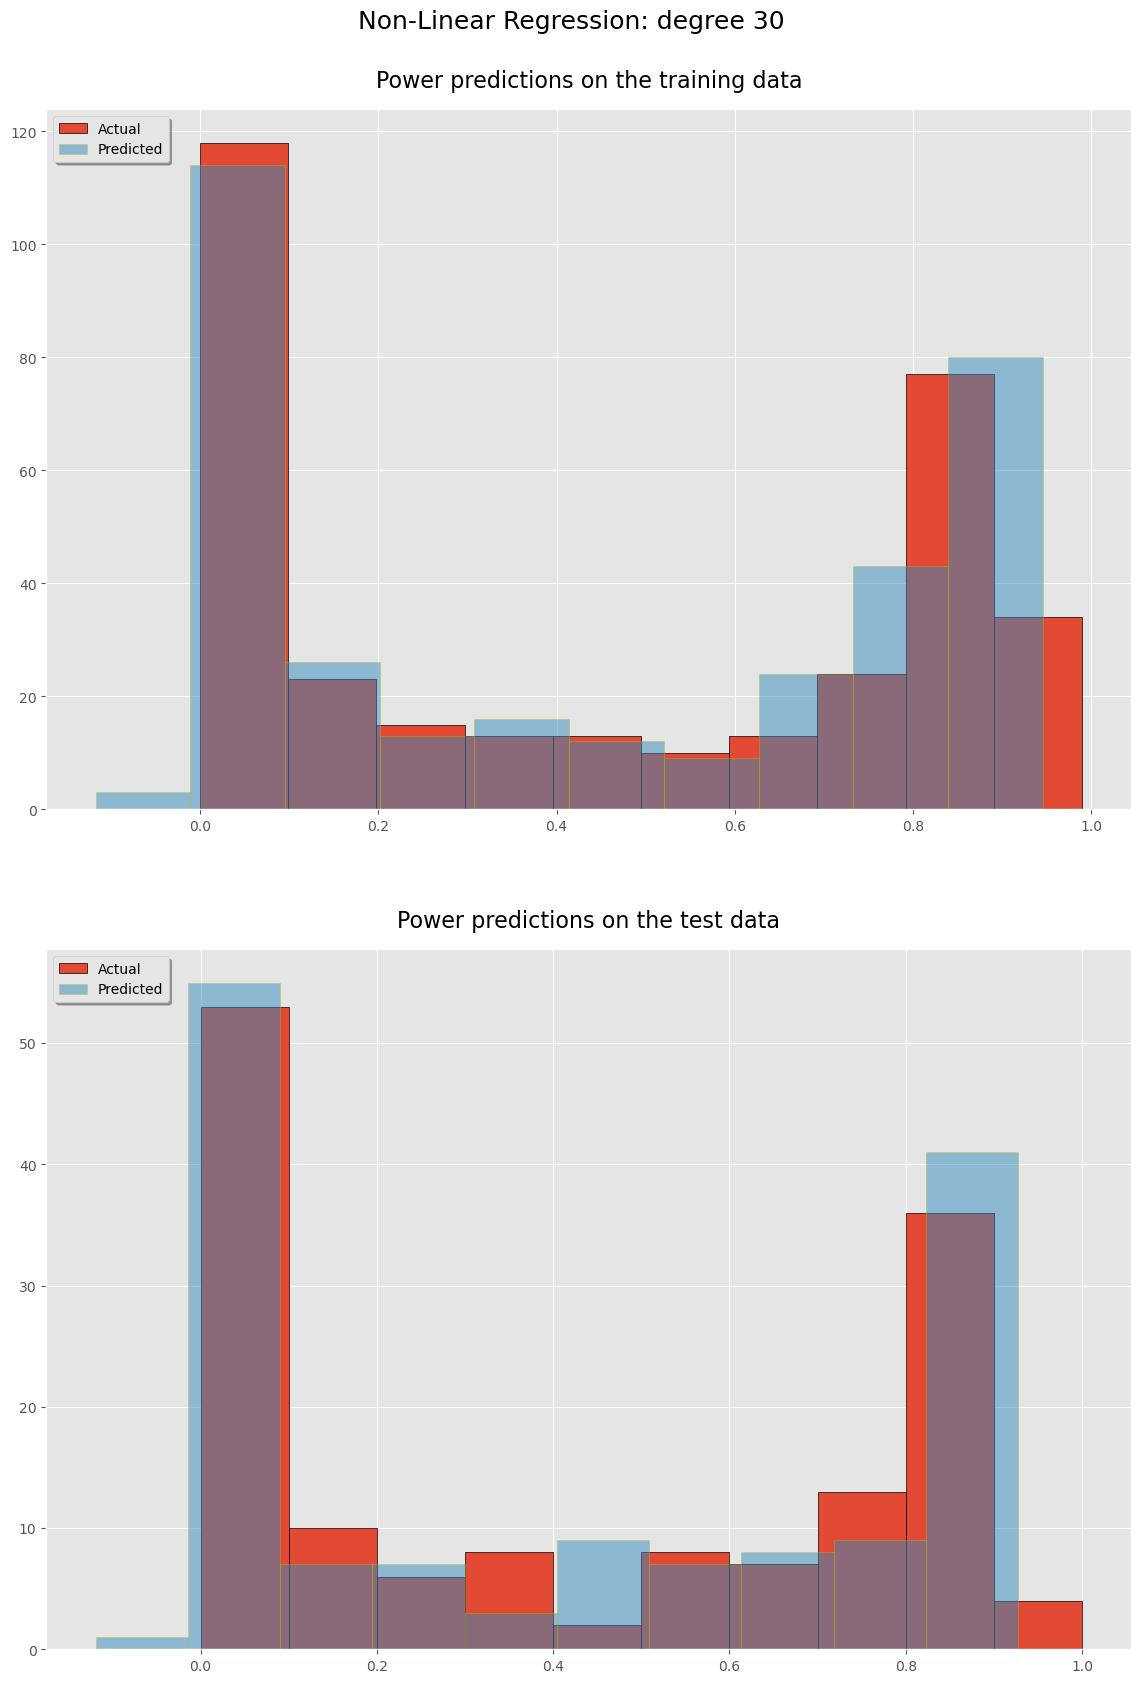

In [29]:
hist(y_train_poly, y_test_poly, f"Non-Linear Regression: degree {n}")

In [31]:
comparison(y_train_poly, y_test_poly)
extra_samples(polynomial)

TRAINING DATA
Actual power:	 4.443
Predicted power: 6.949

TEST DATA
Actual power:	 91.125
Predicted power: 94.927

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: -0.042
Predicted power for wind speed 30: -111722376768461335315808250338553031747390714597231492654432256.000
Predicted power for wind speed 70: -16253638172496560754961551127819604151576556773364195459258166076852142080.000

WITH THE CONSTRAINT
Predicted power for wind speed 0: 0.0
Predicted power for wind speed 30: 0.0
Predicted power for wind speed 70: 0.0


In these results, the predictions are much closer to the actual power output than with the previous model. The model also indicates a tendency for an overestimation of the training power sample but to a much lower degree. The predicted test power is overestimated as well but not significantly.

In the power outputs for 0 m/s, 30 m/s and 70 m/s wind speed, the model predicts a nearly correct 0.0 output for 0 m/s, but for 30 m/s and 70 m/s the predictions are extreme negative values. Therefore, in this model only one constraint for removing negative values was applied.

In [32]:
train(y_train_poly)
test(y_test_poly)

TRAINING DATA
RMSE: 		 0.04402490118563959
R-squared Score: 0.9856339843381305

TEST DATA
RMSE: 		 0.05043282662578617
R-squared Score: 0.9803484987668177


Build, Predict, and Evaluate the Models with SciPy
In contrast to NumPy polyfit, SciPy curve_fit is a more generic method that requires a model-function passed in as an argument along with the training data. It returns the optimized coefficients similarly to polyfit. [10]


Model Building and Prediction.
Simple Linear Regression.

In [33]:
def linear_function(x, a, b):
    return a * x + b

# Fit the model.
linear_s = curve_fit(linear_function, speed_train, power_train)[0]

# Predict power output with simple linear regresiion
y_pred_train_linear = linear_function(speed_train, linear_s[0], linear_s[1])
y_pred_test_linear = linear_function(speed_test, linear_s[0], linear_s[1])

In [34]:
def polynomial_function(x, *p):
    """Polynomial fitting function of arbitrary degree."""
    poly = 0.
    for i, n in enumerate(p):
        poly += n * x**i
    return poly
 
# Fit the model
degree = 69
p0 = np.ones(degree,)
polynomial_s = curve_fit(polynomial_function, speed_train, power_train, p0=p0)

# Predict power output with polynomial regresiion
y_pred_train_polynomial = polynomial_function(speed_train, *tuple(polynomial_s[0]))
y_pred_test_polynomial = polynomial_function(speed_test, *tuple(polynomial_s[0]))

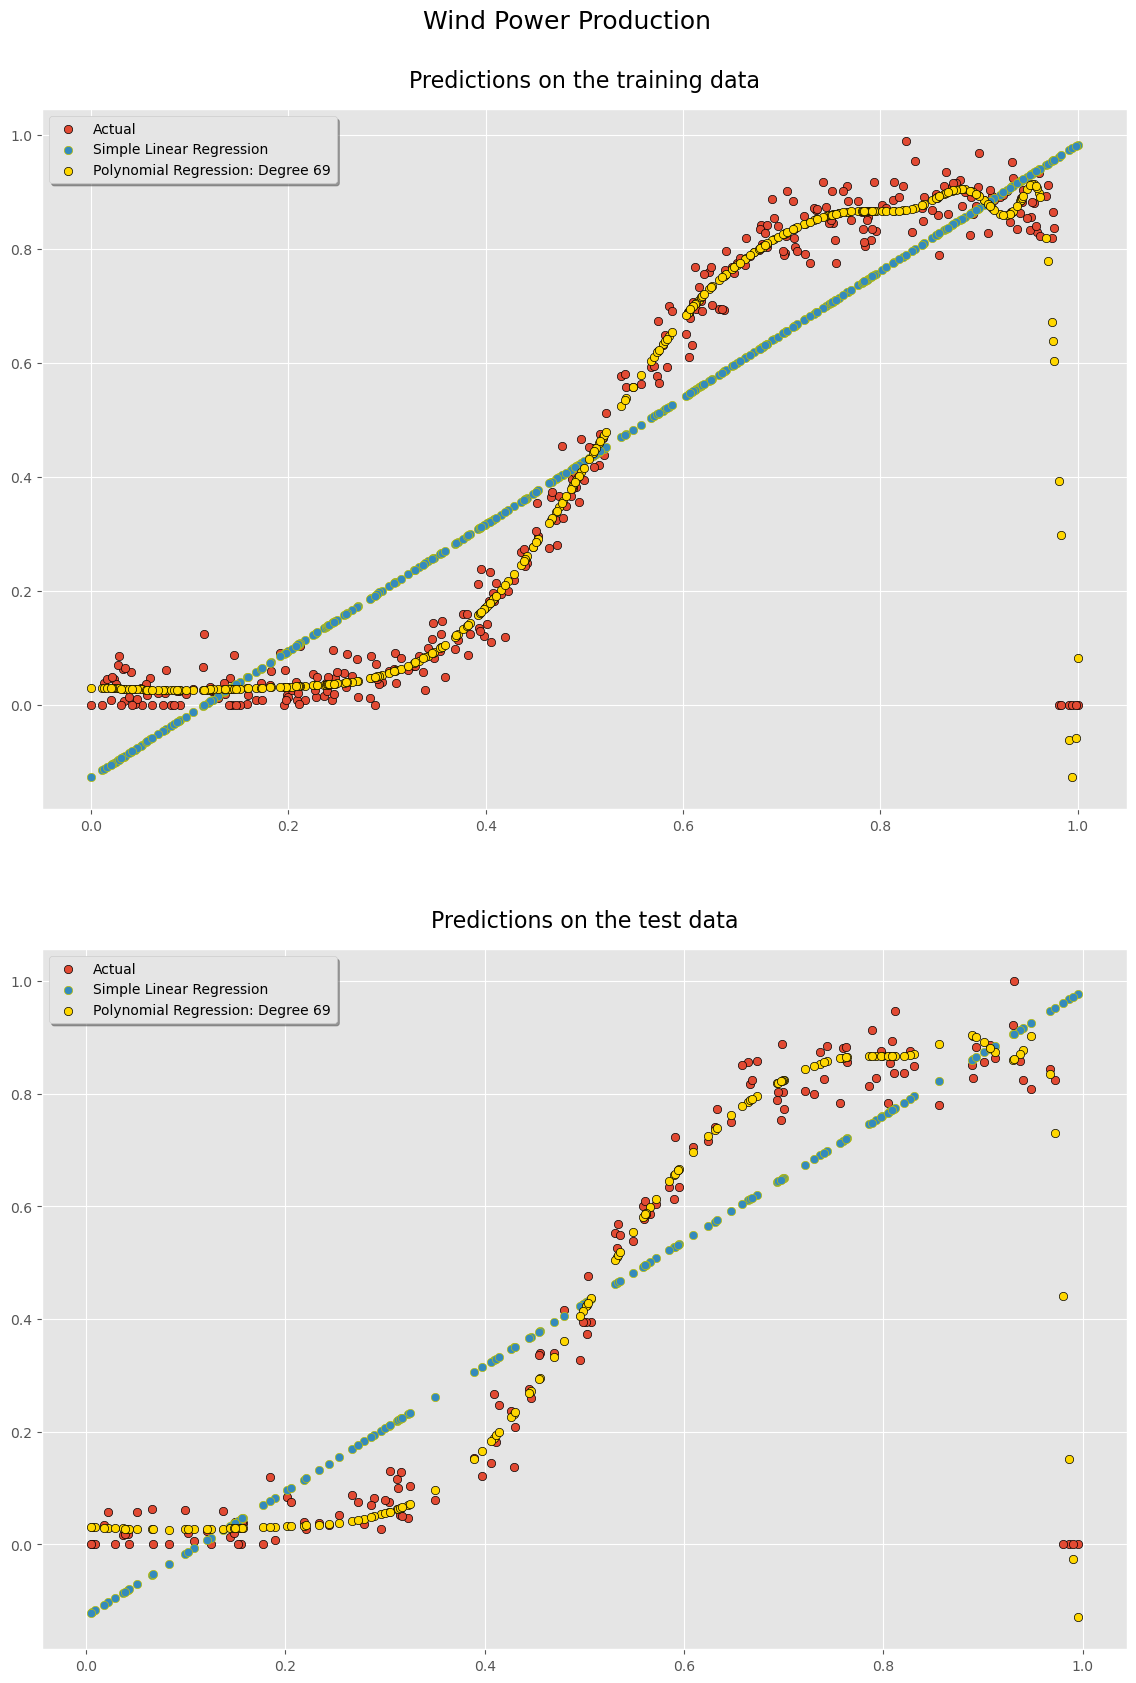

In [35]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
fig.suptitle("Wind Power Production", y = 0.93)
ax1.set_title("Predictions on the training data",y=1.02, fontsize=16)
ax2.set_title("Predictions on the test data",y=1.02, fontsize=16)

# Plot the actual training data and predictions.
ax1.scatter(speed_train, power_train, edgecolor="black",  label="Actual")
ax1.scatter(speed_train, y_pred_train_linear, edgecolor="y", label="Simple Linear Regression")
ax1.scatter(speed_train, y_pred_train_polynomial, c="gold", edgecolor="black", label=f"Polynomial Regression: Degree {degree}")

# Plot the actual test data and predictions.
ax2.scatter(speed_test, power_test, edgecolor="black",  label="Actual")
ax2.scatter(speed_test, y_pred_test_linear, edgecolor="y", label="Simple Linear Regression")
ax2.scatter(speed_test, y_pred_test_polynomial, c="gold", edgecolor="black", label=f"Polynomial Regression: Degree {degree}")

# Show the legend.
ax1.legend(loc='upper left', shadow=True)
ax2.legend(loc='upper left', shadow=True)

# Show the plot.
plt.show()

Whereas Simple Linear Regression appears to be identical to the model built with NumPy, Polynomial Regression fits the actual data in a different way. It produces more negative values and it doesn't start at 0 (although very close to it). Nevertherless, SciPy implementation also confirms that Polynomial Regression is a much better fit for the data than Simple Linear Regression.

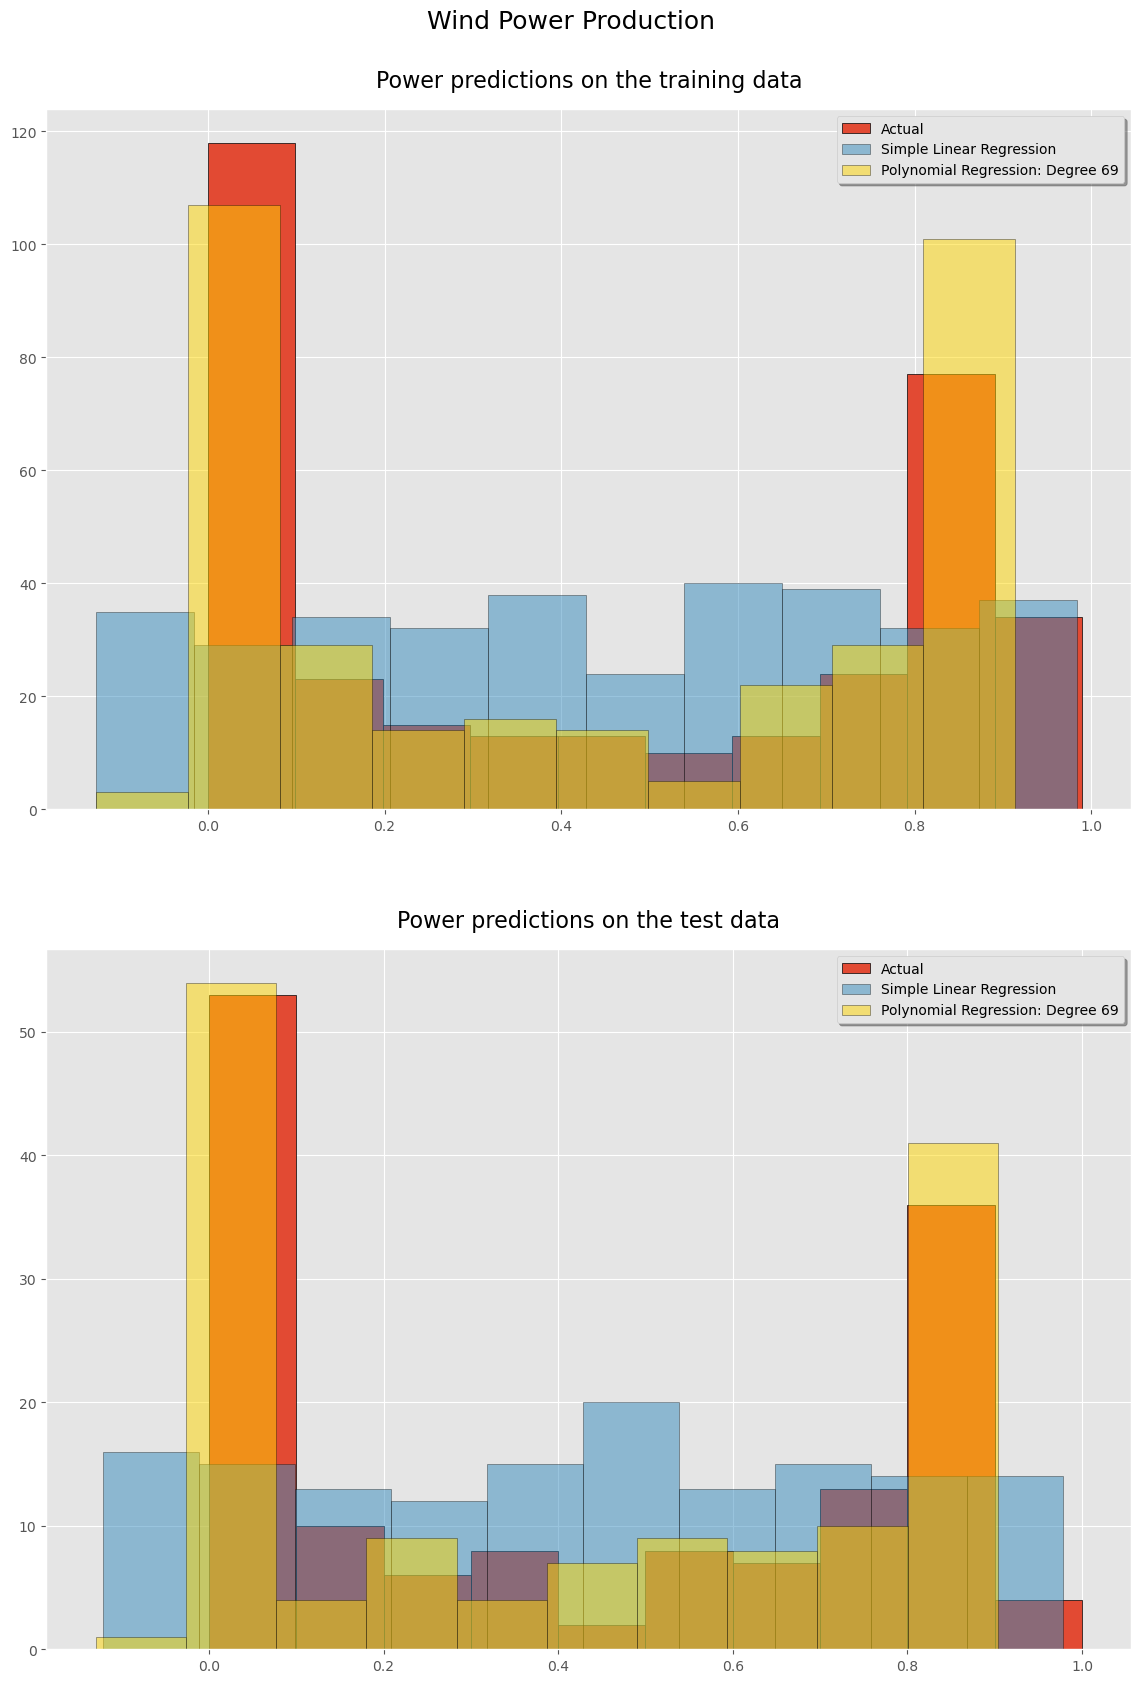

In [36]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
fig.suptitle("Wind Power Production", y = 0.93)
ax1.set_title("Power predictions on the training data",y=1.02, fontsize=16)
ax2.set_title("Power predictions on the test data",y=1.02, fontsize=16)

# Plot the actual training data and predictions.
ax1.hist(power_train, edgecolor="black",  label="Actual")
ax1.hist(y_pred_train_linear, edgecolor="black", label="Simple Linear Regression", alpha=0.5)
ax1.hist(y_pred_train_polynomial, color="gold", edgecolor="black", label=f"Polynomial Regression: Degree {degree}", alpha=0.5)

# Plot the actual test data and predictions.
ax2.hist(power_test, edgecolor="black",  label="Actual")
ax2.hist(y_pred_test_linear, edgecolor="black", label="Simple Linear Regression", alpha=0.5)
ax2.hist(y_pred_test_polynomial, color="gold", edgecolor="black", label=f"Polynomial Regression: Degree {degree}", alpha=0.5)

# Show the legend.
ax1.legend(loc='upper right', shadow=True)
ax2.legend(loc='upper right', shadow=True)

# Show the plot.
plt.show()

In [37]:
print("\nSIMPLE LINEAR REGRESSION")
comparison(y_pred_train_linear, y_pred_test_linear)
print("\nWITHOUT THE CONSTRAINT")
print(f"Predicted power for wind speed 0: {(linear_function(0, linear_s[0], linear_s[1])* np.ptp(y) + np.min(y)):.3f}")
print(f"Predicted power for wind speed 30: {(linear_function(30, linear_s[0], linear_s[1])* np.ptp(y) + np.min(y)):.3f}")
print(f"Predicted power for wind speed 70: {(linear_function(70, linear_s[0], linear_s[1])* np.ptp(y) + np.min(y)):.3f}")

# Printing predicted power for 0, 30 and 70 m/s speed.
print("\nWITH THE CONSTRAINT")
print(f"Predicted power for wind speed 0: {unscale(linear_function(0, linear_s[0], linear_s[1]))}")
print(f"Predicted power for wind speed 30: {unscale(linear_function(30, linear_s[0], linear_s[1]))}")
print(f"Predicted power for wind speed 70: {unscale(linear_function(70, linear_s[0], linear_s[1]))}")

# Comparison of the predictions and actual data for the polynomial regression.
print("\n***********************")
print("POLYNOMIAL REGRESSION")
comparison(y_pred_train_polynomial, y_pred_test_polynomial)
print("\nWITHOUT THE CONSTRAINT")
print(f"Predicted power for wind speed 0: {(polynomial_function(0, *tuple(polynomial_s[0]))* np.ptp(y) + np.min(y)):.3f}")
print(f"Predicted power for wind speed 30: {(polynomial_function(30, *tuple(polynomial_s[0]))* np.ptp(y) + np.min(y)):.3f}")
print(f"Predicted power for wind speed 70: {(polynomial_function(70, *tuple(polynomial_s[0]))* np.ptp(y) + np.min(y)):.3f}")

# Printing predicted power for 0, 30 and 70 m/s speed.
print("\nWITH THE CONSTRAINT")
print(f"Predicted power for wind speed 0: {unscale(polynomial_function(0, *tuple(polynomial_s[0])))}")
print(f"Predicted power for wind speed 30: {unscale(polynomial_function(30, *tuple(polynomial_s[0])))}")
print(f"Predicted power for wind speed 70: {unscale(polynomial_function(70, *tuple(polynomial_s[0])))}")


SIMPLE LINEAR REGRESSION
TRAINING DATA
Actual power:	 4.443
Predicted power: 24.570

TEST DATA
Actual power:	 91.125
Predicted power: 73.797

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: -14.437
Predicted power for wind speed 30: 3768.736
Predicted power for wind speed 70: 8812.966

WITH THE CONSTRAINT
Predicted power for wind speed 0: 0.0
Predicted power for wind speed 30: 0.0
Predicted power for wind speed 70: 0.0

***********************
POLYNOMIAL REGRESSION
TRAINING DATA
Actual power:	 4.443
Predicted power: 6.877

TEST DATA
Actual power:	 91.125
Predicted power: 93.584

WITHOUT THE CONSTRAINT
Predicted power for wind speed 0: 3.460
Predicted power for wind speed 30: -14456745156565906429640902470574531761631048099213538886383887627230499616837955604975996688477267270041600.000
Predicted power for wind speed 70: -152010029964190173091008536417008054403945163992458217163484321672944021194083691499255247672958366085751171216297697921897324347392.000

WITH THE CONSTRAINT

SciPy Simple Linear Regression results are identical to the results in its NumPy implementation.

For the chosen training and test samples, SciPy Polynomial Regression produces results that are closer to the actual data and shows a lower degree of overestimation. As opposed to NumPy polyfit, it predicts a positive value for 0 m/s wind speed and even more extreme negative values for 30 m/s and 70 m/s. Thus, only the latter were fixed by the constraint created earlier.

In [38]:
print("\nSIMPLE LINEAR REGRESSION")
train(y_pred_train_linear)
test(y_pred_test_linear)

print("\nPOLYNOMIAL REGRESSION")
train(y_pred_train_polynomial)
test(y_pred_test_polynomial)


SIMPLE LINEAR REGRESSION
TRAINING DATA
RMSE: 		 0.17499621284165545
R-squared Score: 0.7730151580555513

TEST DATA
RMSE: 		 0.19666060418231232
R-squared Score: 0.6991996513082243

POLYNOMIAL REGRESSION
TRAINING DATA
RMSE: 		 0.04940174959289912
R-squared Score: 0.9819106032434021

TEST DATA
RMSE: 		 0.056993444175041284
R-squared Score: 0.9747327371295192


Whereas the performance of the SciPy Simple Linear Regression is almost identical to the NumPy model, the metrics found Polynomial Regression built with SciPy performing somewhat worse.

Conclusion.
In this notebook, I have built two models, Simple Linear Regression and Polynomial Regression, to make predictions of wind turbine power output for provided wind speed. The model performance evaluation determined that fitting Simple Linear Regression to the data set results in underfitting. A much better result was achieved using Polynomial Regression.

Furthermore, I have compared implementation of the models using two python libraries that are frequently used in data projects: NumPy and SciPy. Given the data set, the implementation of NumPy was more efficient as it requires less code. It also requires a much lower degree for Polynomial Regression which makes it faster to execute. Overall, the best performing model is Polynomial Regression built with NumPy Polyfit.